In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

%pip install tensorflow
%pip install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [4]:
#importing datas and scaling
df=pd.read_csv('/content/KAG_energydata_complete.csv')

df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday


df.drop(columns=['date'], inplace=True)

df['Target'] = (df['Appliances'] > 60).astype(int)
df=df.drop(columns=['Appliances'])

X_new = df.drop(columns=['Appliances', 'Target'])
y_new = df['Target']
scale= StandardScaler()
X_new_scaled = scale.fit_transform(X_new)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

## Neural network part.


In [5]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_new_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_new_train, y_new_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7021 - loss: 0.5587 - val_accuracy: 0.7571 - val_loss: 0.4827
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7825 - loss: 0.4562 - val_accuracy: 0.7964 - val_loss: 0.4345
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8146 - loss: 0.4082 - val_accuracy: 0.8201 - val_loss: 0.4006
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3814 - val_accuracy: 0.8325 - val_loss: 0.3785
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3631 - val_accuracy: 0.8372 - val_loss: 0.3698
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8497 - loss: 0.3494 - val_accuracy: 0.8395 - val_loss: 0.3650
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.3382 - val_accuracy: 0.8423 - val_loss: 0.3542
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3309 - val_accuracy: 0.8483 - val_

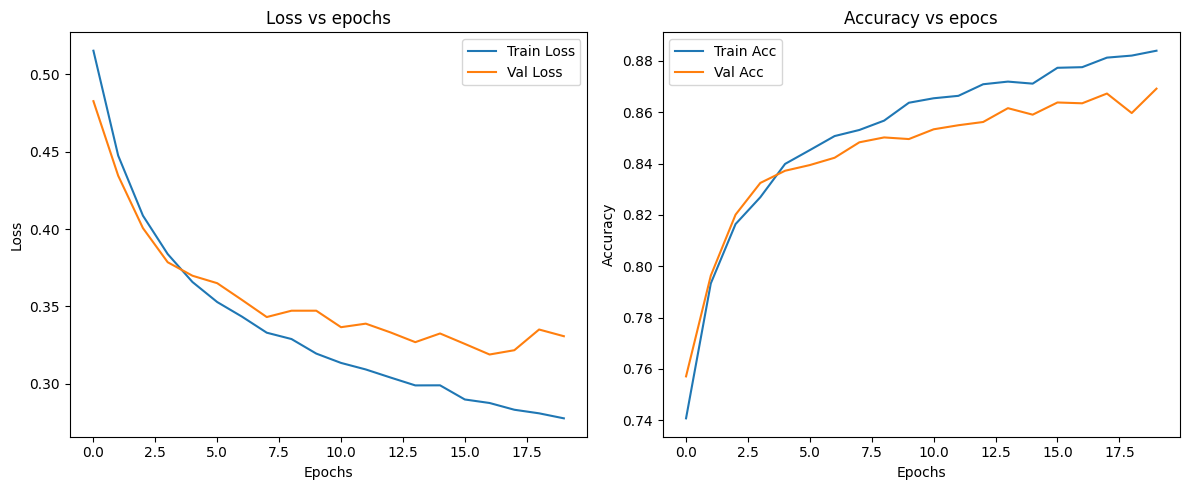

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs epocs')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(X_new_train, y_new_train, verbose=0)
print(f" Train_loss : {train_loss:.4f},Train Accuracy: {train_acc:.4f}")

test_loss, test_acc = model.evaluate(X_new_test, y_new_test, verbose=0)
print(f" Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

 Train_loss : 0.2890,Train Accuracy: 0.8802
 Test Loss: 0.3305, Test Accuracy: 0.8569


Let's try to improve our neural network by raising the number of epochs while using early stopping. Moreover we have a L2 regularization to avoid enormous weights as much as possible.

In [13]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_new_train.shape[1],)),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_n = model.fit(
    X_new_train, y_new_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7208 - loss: 0.6623 - val_accuracy: 0.7837 - val_loss: 0.5510
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.5124 - val_accuracy: 0.8287 - val_loss: 0.4790
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4734 - val_accuracy: 0.8262 - val_loss: 0.4600
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8389 - loss: 0.4340 - val_accuracy: 0.8268 - val_loss: 0.4483
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.4310 - val_accuracy: 0.8379 - val_loss: 0.4329
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.4098 - val_accuracy: 0.8366 - val_loss: 0.4265
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.3970 - val_accuracy: 0.8376 - val_loss: 0.4134
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.3903 - val_accu

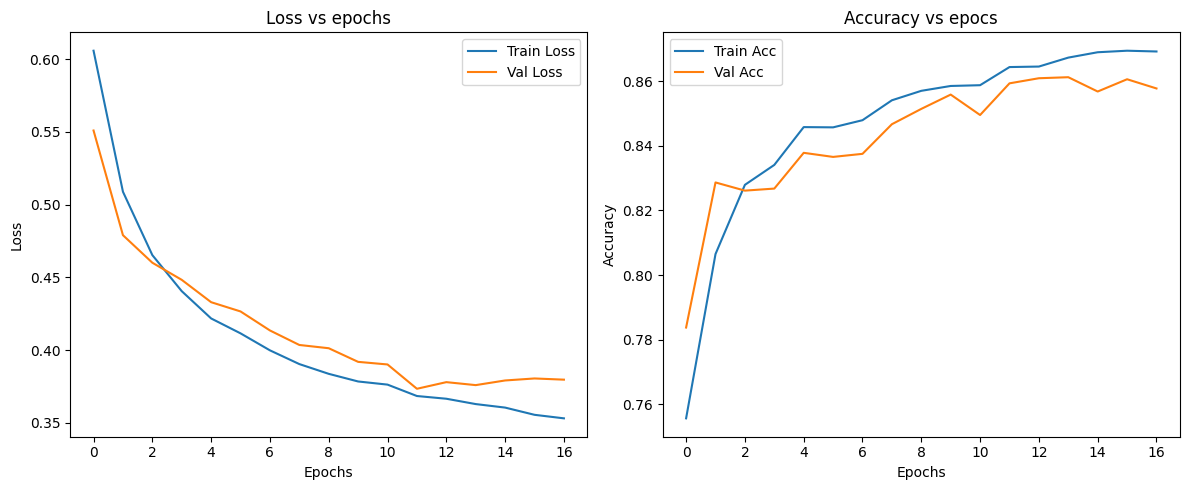

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_n.history['loss'], label='Train Loss')
plt.plot(history_n.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_n.history['accuracy'], label='Train Acc')
plt.plot(history_n.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs epocs')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(X_new_train, y_new_train, verbose=0)
print(f" Train_loss : {train_loss:.4f},Train Accuracy: {train_acc:.4f}")

test_loss, test_acc = model.evaluate(X_new_test, y_new_test, verbose=0)
print(f" Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

 Train_loss : 0.3542,Train Accuracy: 0.8700
 Test Loss: 0.3687, Test Accuracy: 0.8579
